<a href="https://colab.research.google.com/github/rohitLanjewar03/Machine-Learning/blob/main/DL_Practical2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

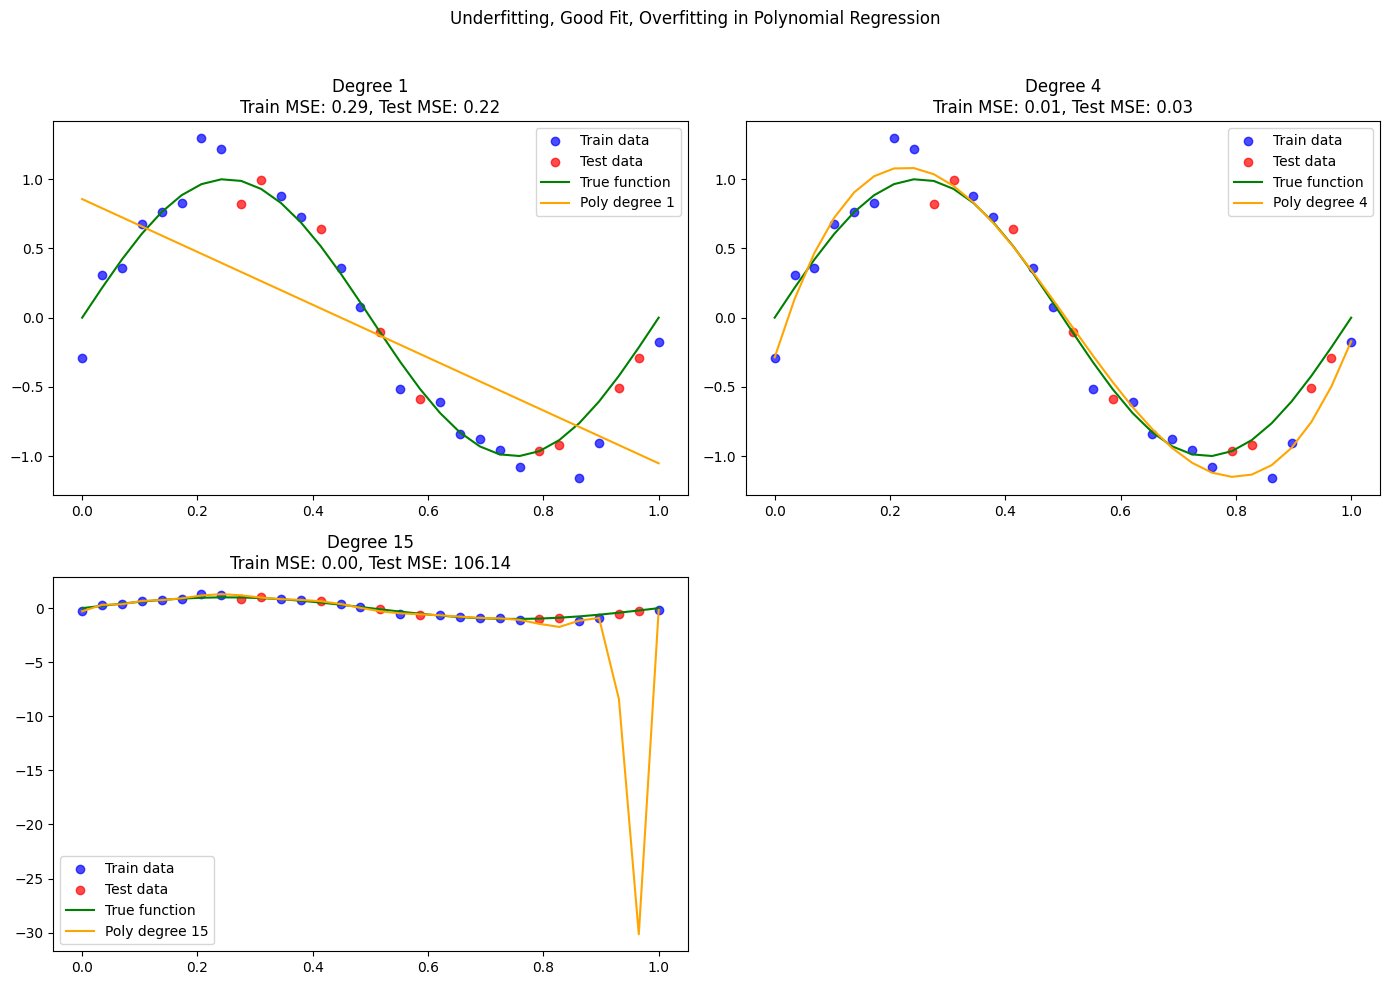

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(4200)
X = np.linspace(0, 1, 30)
y_true = np.sin(2 * np.pi * X)
y = y_true + np.random.normal(0, 0.15, X.shape)

X = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

degrees = [1, 4, 15]
plt.figure(figsize=(14, 10))

for i, degree in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    X_pred_poly = poly.transform(X)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    y_pred = model.predict(X_pred_poly)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    plt.subplot(2, 2, i)
    plt.scatter(X_train, y_train, color='blue', label='Train data', alpha=0.7)
    plt.scatter(X_test, y_test, color='red', label='Test data', alpha=0.7)
    plt.plot(X, y_true, color='green', label='True function')
    plt.plot(X, y_pred, color='orange', label=f'Poly degree {degree}')
    plt.title(f'Degree {degree}\nTrain MSE: {train_error:.2f}, Test MSE: {test_error:.2f}')
    plt.legend()

plt.suptitle('Underfitting, Good Fit, Overfitting in Polynomial Regression')
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()